# Internet Advertisements Data Set

## Data Set Information:

This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). Additional information can be found [here](https://archive.ics.uci.edu/ml/datasets/internet%2Badvertisements).

## Attribute Information:

The dataset has 3 continous (height, width, aratio) and 1555 binary (urls, tags, captions) features. 

## Source:

Creator & donor: Nicholas Kushmerick <nick '@' ucd.ie>

# Learning Objectives
- Identify and impute missing data
- Use normalization as part of the modeling process: min max normalization.
- Use normalization as part of the modeling process: centering and scaling.
- Use hold-out validation to compare the performance of a pair of models using a large data set.

In [1]:
import pandas as pd

# Load the data
internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',', error_bad_lines=False)
print(internetAd.info())
internetAd.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to Target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Question 1.1: Replace all the values of '   ?' with nan. And replace ad. with 1 and nonad. with 0

In [2]:
import numpy as np
#Replace ?

# Strip white spaces before and after each string in all string columns
for column in internetAd:
    if(internetAd[column].dtype == object):
        internetAd[column] = internetAd[column].str.strip()

internetAd.replace('?', np.NaN, inplace=True)

In [3]:
# internetAd['Target'].unique()
internetAd['Target'] = internetAd['Target'].map({'ad.': 1, 'nonad.': 0})

Question 1.1 Part 2: Check that replacing worked

In [4]:
internetAd['Target'].unique()

array([1, 0])

In [5]:
internetAd['height'].unique()

array(['125', '57', '33', '60', '59', nan, '90', '30', '35', '72', '50',
       '120', '2', '65', '44', '80', '64', '31', '100', '74', '93', '21',
       '20', '55', '135', '26', '136', '124', '52', '45', '165', '25',
       '105', '88', '73', '43', '477', '70', '40', '240', '51', '68',
       '171', '71', '29', '38', '36', '46', '12', '95', '41', '96', '16',
       '150', '159', '110', '161', '15', '195', '11', '114', '160', '63',
       '134', '24', '62', '106', '200', '39', '115', '75', '10', '207',
       '32', '27', '48', '107', '28', '23', '54', '102', '149', '119',
       '76', '79', '158', '154', '8', '153', '83', '174', '156', '128',
       '14', '172', '104', '146', '98', '144', '175', '116', '145', '99',
       '220', '185', '34', '239', '140', '262', '142', '191', '22', '87',
       '257', '66', '108', '359', '85', '132', '237', '131', '58', '78',
       '212', '18', '123', '92', '148', '84', '133', '152', '69', '94',
       '82', '214', '49', '61', '89', '56', '193', '77',

Make Sure that "height","width","aratio" is type - float

In [6]:
# Check for data type of all columns
# internetAd.dtypes

internetAd['height'] = internetAd['height'].astype(float)
internetAd['width'] = internetAd['width'].astype(float)
internetAd['aratio'] = internetAd['aratio'].astype(float)

In [7]:
# Also converting local column to numeric from string
# internetAd['local'].unique()
internetAd['local'] = internetAd['local'].astype(float)

Question 1.2: Describe the statistics for each of the columns ["height","width","aratio","local"] 

In [8]:
internetAd['height'].describe()

count    2376.000000
mean       64.021886
std        54.868604
min         1.000000
25%        25.000000
50%        51.000000
75%        85.250000
max       640.000000
Name: height, dtype: float64

In [9]:
internetAd['width'].describe()

count    2378.000000
mean      155.344828
std       130.032350
min         1.000000
25%        80.000000
50%       110.000000
75%       184.000000
max       640.000000
Name: width, dtype: float64

In [10]:
internetAd['aratio'].describe()

count    2369.000000
mean        3.911953
std         6.042986
min         0.001500
25%         1.035700
50%         2.102000
75%         5.333300
max        60.000000
Name: aratio, dtype: float64

In [11]:
internetAd['local'].describe()

count    2033.000000
mean        0.776193
std         0.416897
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: local, dtype: float64

Question 2.1: Caluclate and display the (mean, median, mode) for each of the columns ["height","width","aratio","local"] as well as the overall statistics using describe method.

In [12]:
#Mean
print(internetAd['aratio'].mean())
print(internetAd['height'].mean())
print(internetAd['width'].mean())
print(internetAd['local'].mean())

3.9119525116082734
64.02188552188552
155.3448275862069
0.7761928184948352


In [13]:
#Median
print(internetAd['aratio'].median())
print(internetAd['height'].median())
print(internetAd['width'].median())
print(internetAd['local'].median())

2.102
51.0
110.0
1.0


In [14]:
#Mode
print(internetAd['aratio'].mode())
print(internetAd['height'].mode())
print(internetAd['width'].mode())
print(internetAd['local'].mode())

0    1.0
dtype: float64
0    60.0
dtype: float64
0    468.0
dtype: float64
0    1.0
dtype: float64


Question 2.2: Replace nan values for each of the ["height","width","aratio","local"] with the respective median value

In [15]:
internetAd['height'].fillna(internetAd['height'].median(), inplace=True)
internetAd['width'].fillna(internetAd['width'].median(), inplace=True)
internetAd['local'].fillna(internetAd['local'].median(), inplace=True)
internetAd['aratio'].fillna(internetAd['aratio'].median(), inplace=True)

# Test to check fillna worked. 6th value of nan below should be replaced with 51
# internetAd['height'].unique()

Question 3.1: Plot the distribution of each of ["height","width","aratio","local"]

In [16]:
! pip install --upgrade pip --user
! pip install seaborn --upgrade --user
! pip install scikit-learn --upgrade --user
! pip install matplotlib --upgrade --user

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


<AxesSubplot:xlabel='height', ylabel='Count'>

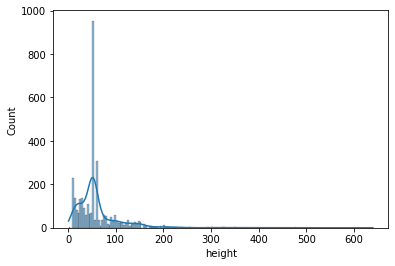

In [17]:
import seaborn as sns
%matplotlib inline

sns.histplot(data=internetAd, x="height", kde=True)

<AxesSubplot:xlabel='width', ylabel='Count'>

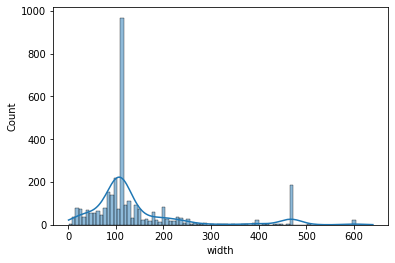

In [18]:
sns.histplot(data=internetAd, x="width", kde=True)

<AxesSubplot:xlabel='aratio', ylabel='Count'>

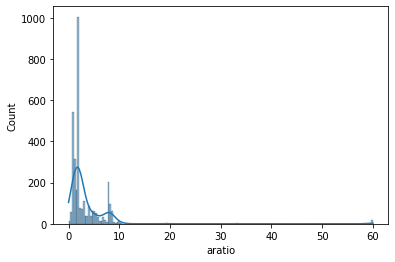

In [19]:
sns.histplot(data=internetAd, x="aratio", kde=True)

<AxesSubplot:xlabel='local', ylabel='Count'>

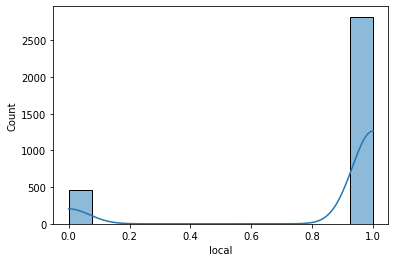

In [20]:
sns.histplot(data=internetAd, x="local", kde=True)

Question 3.2: You have noticed the wide variation across the different features. As a result, let's normalize the features using [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method. Before we do that, we need to split the data into training and testing.

In [21]:
from sklearn.model_selection import train_test_split

X = internetAd.iloc[:,:-1]
y = internetAd.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_minmax_np = scaler.fit_transform(X_train)
X_test_minmax_np = scaler.fit_transform(X_test)
X_train_minmax_scaled = pd.DataFrame(X_train_minmax_np, index=X_train.index, columns=X_train.columns)
X_test_minmax_scaled = pd.DataFrame(X_test_minmax_np, index=X_test.index, columns=X_test.columns)

<AxesSubplot:xlabel='height', ylabel='Count'>

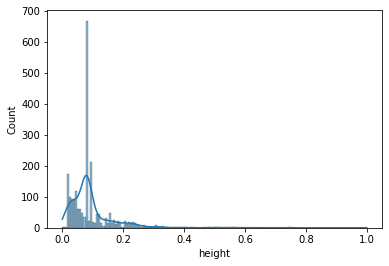

In [23]:
sns.histplot(data=X_train_minmax_scaled, x="height", kde=True)

Question 3.3: Lets build another training set where features are normalized using [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [24]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

#fill this in
X_train_stdsc_np = sscaler.fit_transform(X_train)
X_test_stdsc_np = sscaler.fit_transform(X_test)
X_train_std_scaled = pd.DataFrame(X_train_stdsc_np, index=X_train.index, columns=X_train.columns)
X_test_std_scaled = pd.DataFrame(X_test_stdsc_np, index=X_test.index, columns=X_test.columns)

<AxesSubplot:xlabel='height', ylabel='Count'>

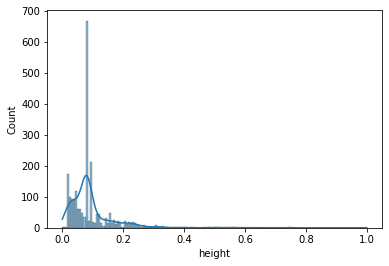

In [25]:
sns.histplot(data=X_train_minmax_scaled, x="height", kde=True)

Question 4.1: Apply [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the above minmax scaled dataset with class_weight='balanced', solver='saga', and max_iter=1000. Calculate Accuracy, Confusion Matrix, Precision, and Recall.


In [26]:
from sklearn.linear_model import LogisticRegression

log_reg_model_minmax_l2 = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000).fit(X_train_minmax_scaled, y_train.values.ravel())

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_minmax_l2 = log_reg_model_minmax_l2.predict(X_test_minmax_scaled)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_minmax_l2))
a1 = accuracy_score(y_test, y_pred_minmax_l2)
print("Accuracy: ", a1)
p1 = precision_score(y_test, y_pred_minmax_l2, average="macro")
print("Precision: ", p1)
r1 = recall_score(y_test, y_pred_minmax_l2, average="macro")
print("Recall: ", r1)

Confusion matrix:  [[896  20]
 [ 16 151]]
Accuracy:  0.9667590027700831
Precision:  0.9327485380116959
Recall:  0.9411787778155479


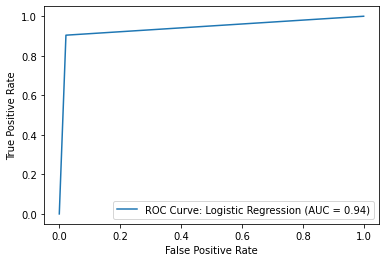

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_minmax_l2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression')
display.plot()
plt.show()

Question 4.2: Repeat question 4.1 setting penalty to {‘l1’,'l2', ‘elasticnet’}. 
- Set C=0.1 for l1.
- Set l1_ratio=0.5 for elasticnet.

In [29]:
#penalty='l1'
log_reg_model_minmax_l1 = LogisticRegression(penalty='l1', C=0.1, class_weight='balanced', solver='saga', max_iter=1000).fit(X_train_minmax_scaled, y_train.values.ravel())

In [30]:
y_pred_minmax_l1 = log_reg_model_minmax_l1.predict(X_test_minmax_scaled)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_minmax_l1))
a2 = accuracy_score(y_test, y_pred_minmax_l1)
print("Accuracy: ", a2)
p2 = precision_score(y_test, y_pred_minmax_l1, average="macro")
print("Precision: ", p2)
r2 = recall_score(y_test, y_pred_minmax_l1, average="macro")
print("Recall: ", r2)

Confusion matrix:  [[879  37]
 [ 33 134]]
Accuracy:  0.9353647276084949
Precision:  0.8737207602339181
Recall:  0.8810010982402008


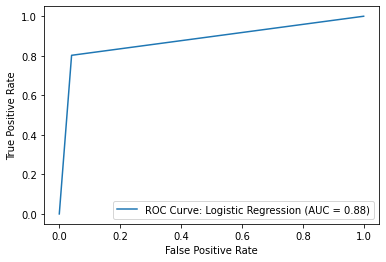

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_minmax_l1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression')
display.plot()
plt.show()

In [32]:
#penalty='elasticnet'
log_reg_model_minmax_en = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, class_weight='balanced', solver='saga', max_iter=1000).fit(X_train_minmax_scaled, y_train.values.ravel())

In [33]:
y_pred_minmax_en = log_reg_model_minmax_en.predict(X_test_minmax_scaled)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_minmax_en))
a3 = accuracy_score(y_test, y_pred_minmax_en)
print("Accuracy: ", a3)
p3 = precision_score(y_test, y_pred_minmax_en, average="macro")
print("Precision: ", p3)
r3 = recall_score(y_test, y_pred_minmax_en, average="macro")
print("Recall: ", r3)

Confusion matrix:  [[893  23]
 [ 16 151]]
Accuracy:  0.96398891966759
Precision:  0.9251071658890027
Recall:  0.9395412232303951


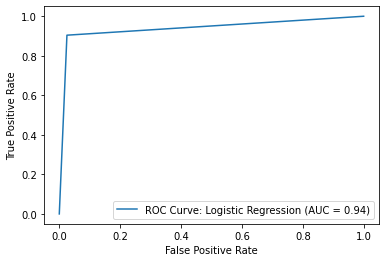

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_minmax_en)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression')
display.plot()
plt.show()

Question 5: How do the three models compare? How did you make the comparison?

The three models have their own accuracy, precision, recall values. Model with l1 penalty has the lowest accuracy and lowest AUC value. The models using minmax scaler but l2 and elacticnet penalties have same AUCs and very similar accuracies but l2 does slightly better in terms of accuracy and precisio but elasticnet does marginally better with recall. This means, out of all truely positive data points, this model did better in correctly predicting the positive values where as it did more poorly on correctly predicting the class out of all times it predicted positively.

Made comparison using performance metrics: precision, recall, AUC

Question 6: Repeat steps 4.1-4.3 with the standard scaled dataset

In [35]:
log_reg_model_stdsc_en = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, class_weight='balanced', solver='saga', max_iter=3000).fit(X_train_std_scaled, y_train.values.ravel())

In [36]:
y_pred_stdsc_en = log_reg_model_stdsc_en.predict(X_test_std_scaled)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_stdsc_en))
a4 = accuracy_score(y_test, y_pred_stdsc_en)
print("Accuracy: ", a4)
p4 = precision_score(y_test, y_pred_stdsc_en, average="macro")
print("Precision: ", p4)
r4 = recall_score(y_test, y_pred_stdsc_en, average="macro")
print("Recall: ", r4)

Confusion matrix:  [[894  22]
 [ 17 150]]
Accuracy:  0.96398891966759
Precision:  0.9267161054808158
Recall:  0.9370930627827314


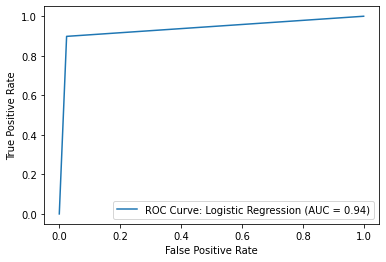

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_stdsc_en)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression')
display.plot()
plt.show()

In [38]:
log_reg_model_stdsc_l1 = LogisticRegression(penalty='l1', C=0.1, class_weight='balanced', solver='saga', max_iter=3000).fit(X_train_std_scaled, y_train.values.ravel())

In [39]:
y_pred_stdsc_l1 = log_reg_model_stdsc_l1.predict(X_test_std_scaled)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_stdsc_l1))
a5 = accuracy_score(y_test, y_pred_stdsc_l1)
print("Accuracy: ", a5)
p5 = precision_score(y_test, y_pred_stdsc_l1, average="macro")
print("Precision: ", p5)
r5 = recall_score(y_test, y_pred_stdsc_l1, average="macro")
print("Recall: ", r5)

Confusion matrix:  [[895  21]
 [ 17 150]]
Accuracy:  0.9649122807017544
Precision:  0.9292763157894737
Recall:  0.9376389143111157


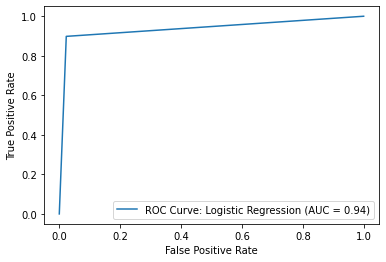

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_stdsc_l1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression')
display.plot()
plt.show()

In [41]:
log_reg_model_stdsc_l2 = LogisticRegression(class_weight='balanced', solver='saga', max_iter=3000).fit(X_train_std_scaled, y_train.values.ravel())

In [42]:
y_pred_stdsc_l2 = log_reg_model_stdsc_l2.predict(X_test_std_scaled)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_stdsc_l2))
a6 = accuracy_score(y_test, y_pred_stdsc_l2)
print("Accuracy: ", a6)
p6 = precision_score(y_test, y_pred_stdsc_l2, average="macro")
print("Precision: ", p6)
r6 = recall_score(y_test, y_pred_stdsc_l2, average="macro")
print("Recall: ", r6)

Confusion matrix:  [[897  19]
 [ 17 150]]
Accuracy:  0.9667590027700831
Precision:  0.9344872010669014
Recall:  0.9387306173678843


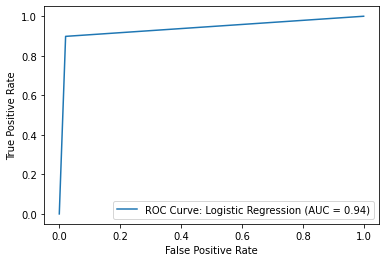

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_stdsc_l2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression')
display.plot()
plt.show()

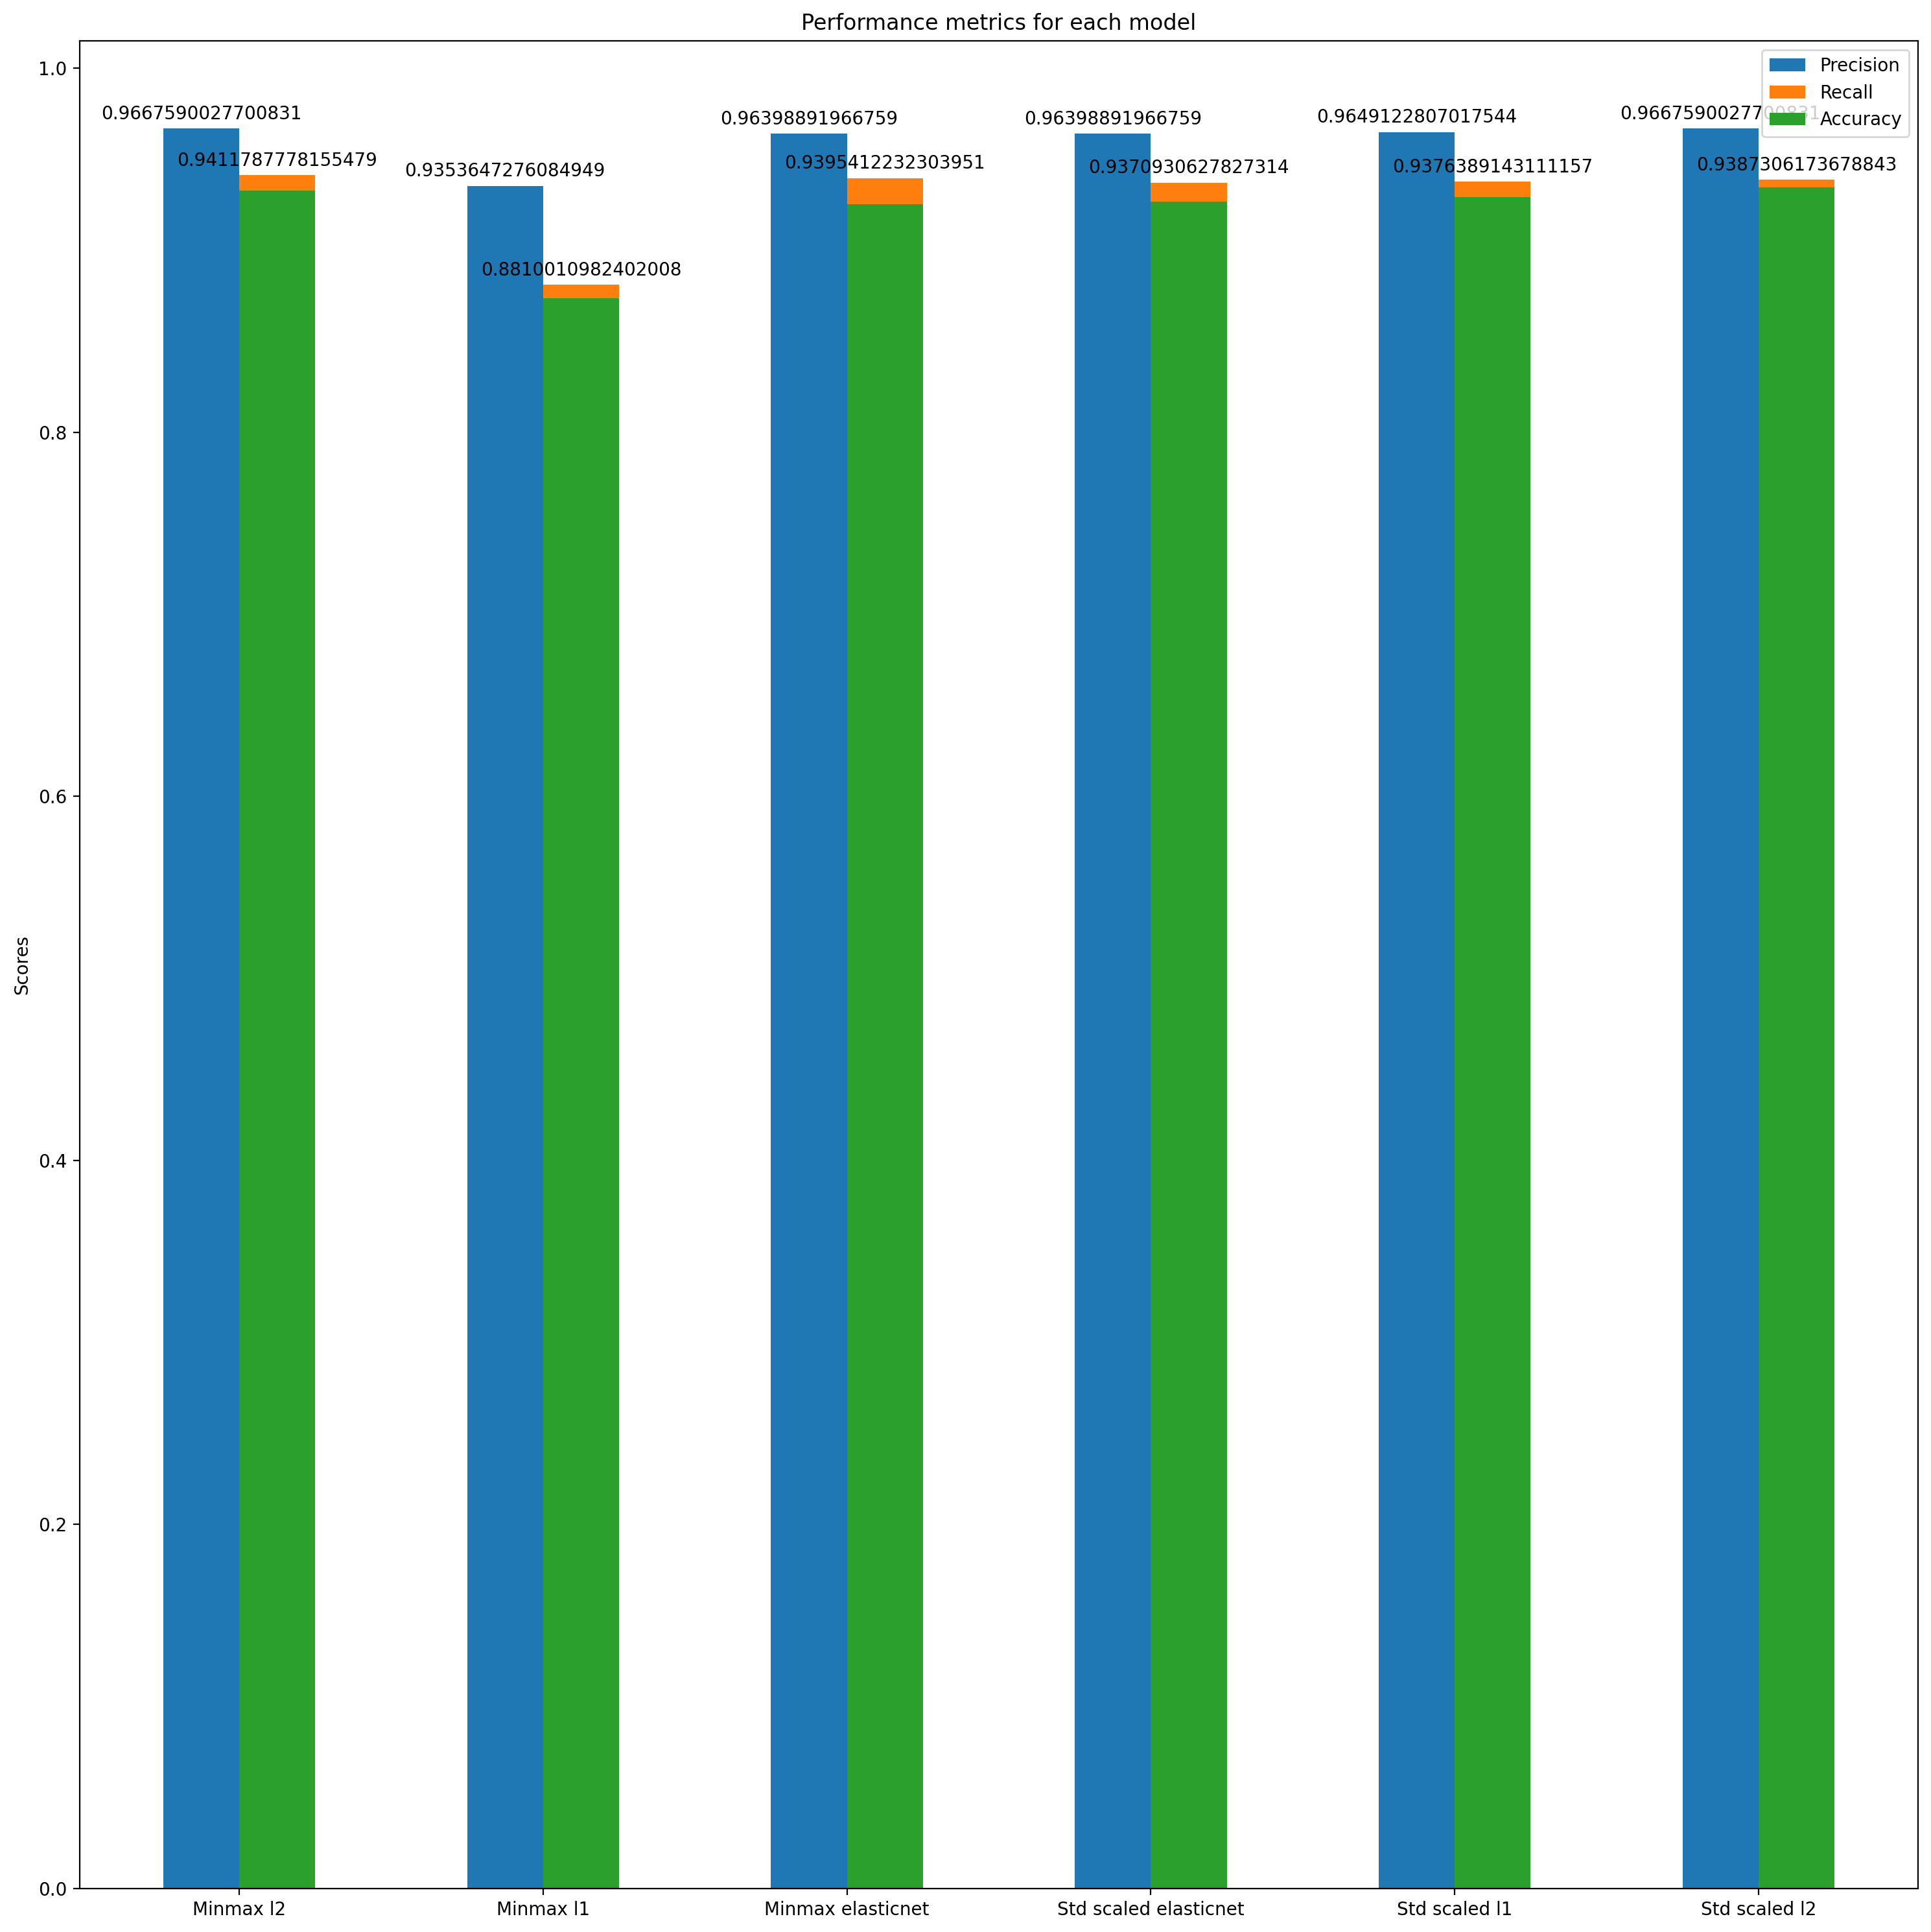

In [44]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 200

models = ("Minmax l2", "Minmax l1", "Minmax elasticnet", "Std scaled elasticnet", "Std scaled l1", "Std scaled l2")
precision = [a1, a2, a3, a4, a5, a6]
recall = [r1, r2, r3, r4, r5, r6]
accuracy = [p1, p2, p3, p4, p5, p6]

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, precision, width, label='Precision')
rects2 = ax.bar(x + width/2, recall, width, label='Recall')
rects3 = ax.bar(x + width/2, accuracy, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance metrics for each model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Some comments:
1. The above graph shows the comparison of the performance metrics of the 6 models.
2. As per the top comment here: https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati, delayed convergence might be because of difference in scaling. The standard scaled data passed to logistic regression model needs more number of iteration to converge than min max scaler. My understanding from this is that for the given data set, min max scaler works better. 
3. This article here compares the different scalers: https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler. Minmax scaler does not change shape of data whereas standard scaler will give us zero mean and unit standard deviation on the column. Maybe that's why minmax works better here, because the shape is retained?
4. We are applying penalties here to focus on important features since there a lot of them (penalizing the less important ones by reducing coefficients). This article I've referenced: https://pub.towardsai.net/lasso-l1-vs-ridge-l2-vs-elastic-net-regularization-for-classification-model-409c3d86f6e9 tells me more about what each type of regularization does. l2 reduces all unimportant feature coefficients to zero and elastic net reduces some to zero. Since elastic net and l2 models performed better, it might mean that we have features that are not needed and the models are doing better because of automatic feature selection done by l2 and elastic.